In [ ]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 26.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


In [ ]:
!pip install --upgrade pandas

In [ ]:
!pip uninstall pandas
!pip install pandas

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pandas-2.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pandas/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-2.2.2
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

## Discretizando valores numéricos utilizando a biblioteca scikit-learn

In [ ]:
dataframe = pd.read_csv("titanic_tratado.csv")

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(dataframe.drop("Survived",axis=1),dataframe["Survived"],test_size=0.3,random_state=0)

In [ ]:
discretizador = KBinsDiscretizer(n_bins=8,encode="ordinal",strategy="uniform")

In [ ]:
discretizador.fit(X_treino[["Age","Fare"]])

KBinsDiscretizer(encode='ordinal', n_bins=8, strategy='uniform')

In [ ]:
discretizador.fit(X_treino[["Age","Fare"]])
KBinsDiscretizer(encode='ordinal',n_bins=8,strategy='uniform')

KBinsDiscretizer(encode='ordinal', n_bins=8, strategy='uniform')

In [ ]:
discretizador.bin_edges_

array([array([ 0.67   , 10.58625, 20.5025 , 30.41875, 40.335  , 50.25125,
              60.1675 , 70.08375, 80.     ])                             ,
       array([  0.     ,  64.04115, 128.0823 , 192.12345, 256.1646 , 320.20575,
              384.2469 , 448.28805, 512.3292 ])                                ],
      dtype=object)

In [ ]:

treino_disc= discretizador.transform(X_treino[["Age","Fare"]])
teste_disc= discretizador.transform(X_teste[["Age","Fare"]])

In [ ]:
treino_disc = pd.DataFrame(treino_disc,columns=["Age","Fare"])
teste_disc = pd.DataFrame(teste_disc,columns=["Age","Fare"])

In [ ]:
df1 = treino_disc['Age'].value_counts() / len(treino_disc)
df2 = teste_disc['Age'].value_counts() / len(teste_disc)

In [ ]:
aux = pd.concat([df1, df2], axis=1)

In [ ]:
aux.columns = ['treino','teste']

In [ ]:
aux.head()

,treino,teste
Age,,
2.0,0.451043,0.466418
3.0,0.184591,0.149254
1.0,0.120385,0.152985
4.0,0.101124,0.085821
0.0,0.073836,0.067164


Text(0, 0.5, 'Número de observações por intervalos')

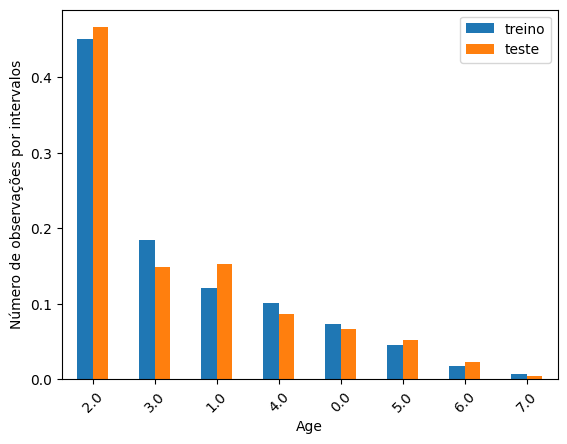

In [ ]:
aux.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Número de observações por intervalos')

Text(0, 0.5, 'Número de observações por intervalos')

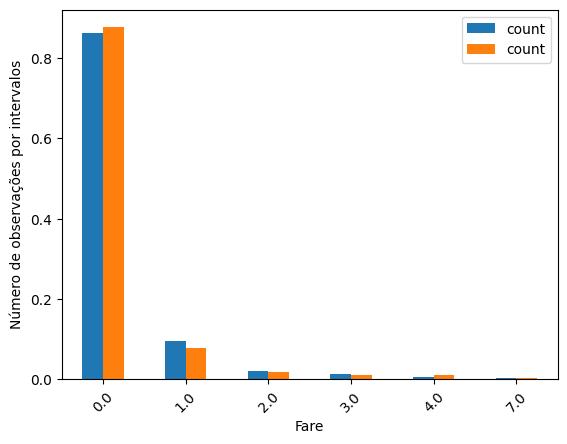

In [ ]:
df1_fare = treino_disc['Fare'].value_counts() / len(treino_disc)
df2_fare = teste_disc['Fare'].value_counts() / len(teste_disc)

aux_fare = pd.concat([df1_fare, df2_fare], axis=1)
aux.columns = ['treino','teste']

aux_fare.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Número de observações por intervalos')

## Discretizando valores numéricos utilizando a biblioteca feature-engine

In [ ]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [ ]:
discretizador_ft = EqualWidthDiscretiser(bins=8, variables=["Age","Fare"])

In [ ]:
discretizador_ft.fit(X_treino)

EqualWidthDiscretiser(bins=8, variables=['Age', 'Fare'])

In [ ]:
discretizador_ft.binner_dict_

{'Age': [-inf,
  10.58625,
  20.5025,
  30.418750000000003,
  40.335,
  50.25125,
  60.167500000000004,
  70.08375,
  inf],
 'Fare': [-inf,
  64.04115,
  128.0823,
  192.12345,
  256.1646,
  320.20575,
  384.2469,
  448.28805,
  inf]}

In [ ]:
df_treino = discretizador_ft.transform(X_treino)
df_teste = discretizador_ft.transform(X_teste)

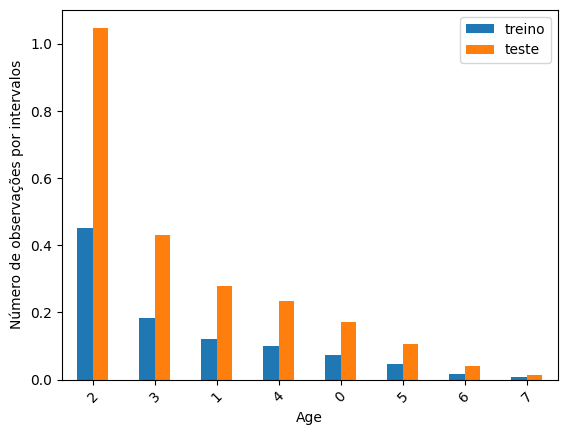

In [ ]:
df1_disc = df_treino['Age'].value_counts() / len(df_treino)
df2_disc = df_treino['Age'].value_counts() / len(df_teste)

aux_disc = pd.concat([df1_disc, df2_disc], axis=1)

aux_disc.columns = ['treino','teste']

aux_disc.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Número de observações por intervalos');

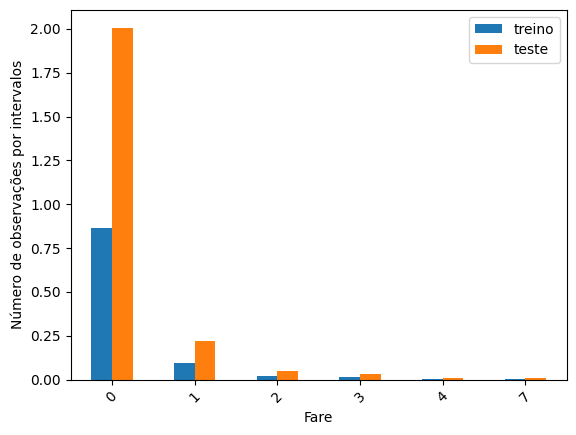

In [ ]:
df1_disc_fare = df_treino['Fare'].value_counts() / len(df_treino)
df2_disc_fare = df_treino['Fare'].value_counts() / len(df_teste)

aux_disc_fare = pd.concat([df1_disc_fare, df2_disc_fare], axis=1)

aux_disc_fare.columns = ['treino','teste']

aux_disc_fare.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Número de observações por intervalos');

## Discretização de valores numéricos utilizando faixa de frequência igual com a biblioteca scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(dataframe.drop("Survived",axis=1),dataframe["Survived"],test_size=0.3,random_state=0)

In [ ]:
discretizador_freq = KBinsDiscretizer(n_bins=4, encode="ordinal",strategy="quantile")

In [36]:
X_treino.dtypes

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [37]:
X_treino_numeric = X_treino.select_dtypes(include=["int64","float64"])
X_teste_numeric = X_teste.select_dtypes(include=["int64","float64"])

In [39]:
X_treino_numeric.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
857,858,1,51.0,0,0,26.5500
52,53,1,49.0,1,0,76.7292
386,387,3,1.0,5,2,46.9000
124,125,1,54.0,0,1,77.2875
578,579,3,28.0,1,0,14.4583


In [41]:
discretizador_freq.fit(X_treino_numeric)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(


KBinsDiscretizer(encode='ordinal', n_bins=4)

In [42]:
discretizador_freq.bin_edges_

array([array([  1. , 217.5, 449. , 670.5, 890. ]), array([1. , 1.5, 3. ]),
       array([ 0.67, 23.  , 28.  , 36.  , 80.  ]), array([0., 1., 8.]),
       array([0., 6.]),
       array([  0.    ,   7.925 ,  15.    ,  31.3875, 512.3292])],
      dtype=object)

In [46]:
treino_freq = discretizador_freq.transform(X_treino_numeric)
teste_freq = discretizador_freq.transform(X_teste_numeric)

#treino_freq = pd.DataFrame(treino_freq,columns=X_treino.columns)
#teste_freq = pd.DataFrame(teste_freq,columns=X_teste.columns)

In [48]:
treino_freq = pd.DataFrame(treino_freq,columns=X_treino_numeric.columns)
teste_freq = pd.DataFrame(teste_freq,columns=X_teste_numeric.columns)

In [51]:
def compara_proporcao(dataframe1,dataframe2):
    prop1 = dataframe1.value_counts() / len(dataframe1)
    prop2 = dataframe2.value_counts() / len(dataframe2)

    aux = pd.concat([prop1, prop2], axis=1)
    plt.figure(figsize=(12,9))
    aux.columns = ['treino', 'teste']
    aux.plot.bar()
    plt.xticks(rotation=45)
    plt.ylabel('Número de observações por intervalos')

<Figure size 1200x900 with 0 Axes>

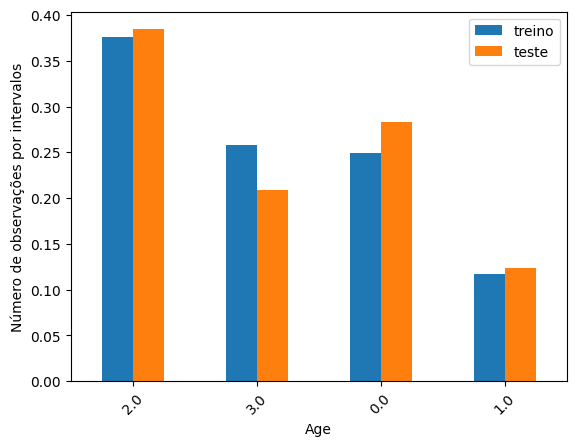

In [52]:
compara_proporcao(treino_freq["Age"],teste_freq["Age"])

<Figure size 1200x900 with 0 Axes>

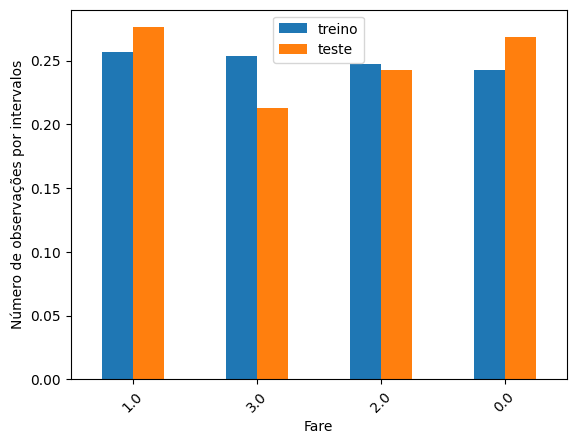

In [53]:
compara_proporcao(treino_freq["Fare"],teste_freq["Fare"])

## Discretizando valores numéricos por frequência igual utilizando a biblioteca feature-engine

In [56]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [59]:
discretizador_ft = EqualWidthDiscretiser()
discretizador_ft.fit(X_treino)

EqualWidthDiscretiser()

In [61]:
discretizador_ft.binner_dict_

{'PassengerId': [-inf,
  89.9,
  178.8,
  267.70000000000005,
  356.6,
  445.5,
  534.4000000000001,
  623.3000000000001,
  712.2,
  801.1,
  inf],
 'Pclass': [-inf,
  1.2,
  1.4,
  1.6,
  1.8,
  2.0,
  2.2,
  2.4000000000000004,
  2.6,
  2.8,
  inf],
 'Age': [-inf,
  8.603,
  16.536,
  24.469,
  32.402,
  40.335,
  48.268,
  56.201,
  64.134,
  72.067,
  inf],
 'SibSp': [-inf,
  0.8,
  1.6,
  2.4000000000000004,
  3.2,
  4.0,
  4.800000000000001,
  5.6000000000000005,
  6.4,
  7.2,
  inf],
 'Parch': [-inf,
  0.6,
  1.2,
  1.7999999999999998,
  2.4,
  3.0,
  3.5999999999999996,
  4.2,
  4.8,
  5.3999999999999995,
  inf],
 'Fare': [-inf,
  51.23292,
  102.46584,
  153.69876,
  204.93168,
  256.1646,
  307.39752,
  358.63044,
  409.86336,
  461.09628,
  inf]}

In [62]:
treino_ft = discretizador_ft.transform(X_treino)
teste_ft =discretizador_ft.transform(X_teste)

In [63]:
treino_ft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,9,0,"Daly, Mr. Peter Denis",male,6,0,0,113055,0,E17,S
52,0,0,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,6,1,0,PC 17572,1,D33,C
386,4,9,"Goodwin, Master. Sidney Leonard",male,0,6,3,CA 2144,0,Unknown,S
124,1,0,"White, Mr. Percival Wayland",male,6,0,1,35281,1,D26,S
578,6,9,"Caram, Mrs. Joseph (Maria Elias)",female,3,1,0,2689,0,Unknown,C


In [64]:
teste_ft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,5,9,"Yousseff, Mr. Gerious",male,3,0,0,2627,0,Unknown,C
648,7,9,"Willey, Mr. Edward",male,3,0,0,S.O./P.P. 751,0,Unknown,S
278,3,9,"Rice, Master. Eric",male,0,4,1,382652,0,Unknown,Q
31,0,0,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,3,1,0,PC 17569,2,B78,C
255,2,9,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,3,0,3,2650,0,Unknown,C


<Figure size 1200x900 with 0 Axes>

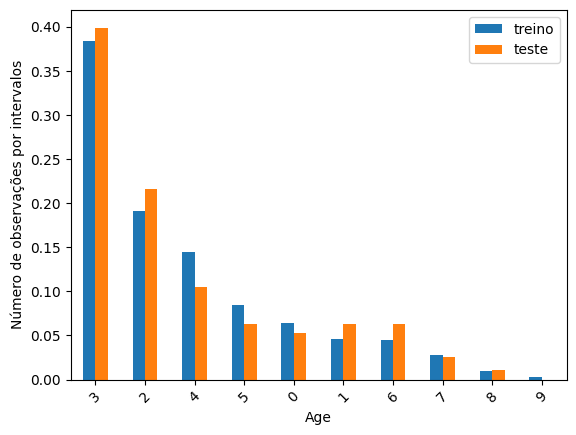

In [65]:
compara_proporcao(treino_ft["Age"],teste_ft["Age"])

<Figure size 1200x900 with 0 Axes>

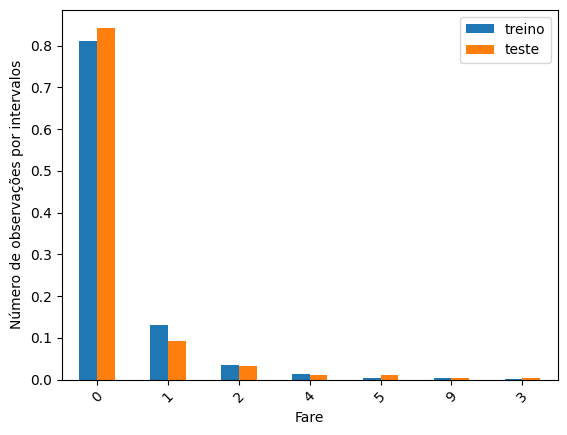

In [66]:
compara_proporcao(treino_ft["Fare"],teste_ft["Fare"])

In [67]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(dataframe.drop("Survived",axis=1),dataframe["Survived"],test_size=0.3,random_state=0)

In [68]:
from sklearn.preprocessing import KBinsDiscretizer

In [69]:
discretizador = KBinsDiscretizer(n_bins=4,encode="ordinal",strategy="kmeans")

In [70]:
discretizador.fit(X_treino[["Age","Fare"]])

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='kmeans')

In [71]:
treino_discretizado = discretizador.transform(X_treino[["Age","Fare"]])
teste_discretizado = discretizador.transform(X_teste[["Age","Fare"]])

In [72]:
treino_discretizado = pd.DataFrame(treino_discretizado,columns=["Age","Fare"])
teste_discretizado = pd.DataFrame(teste_discretizado,columns=["Age","Fare"])

In [73]:
treino_discretizado.head()

,Age,Fare
0,3.0,0.0
1,2.0,1.0
2,0.0,0.0
3,3.0,1.0
4,1.0,0.0


In [74]:
teste_discretizado.head()

,Age,Fare
0,1.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,0.0


In [75]:
discretizador.bin_edges_

array([array([ 0.67      , 19.33109147, 34.09866974, 50.02125865, 80.        ]),
       array([  0.        ,  47.88407617, 153.5736125 , 369.65331667,
              512.3292    ])                                         ],
      dtype=object)

In [76]:
discretizador.n_bins_

array([4, 4])

## Discretização por árvore utilizando a biblioteca scikit-learn

In [77]:
mercado = pd.read_csv("mercado.csv")

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
colunas_para_normalizar = ['renda', 'gasto']
df_normalizado = mercado.copy()
df_normalizado[colunas_para_normalizar] = scaler.fit_transform(mercado[colunas_para_normalizar])

Text(0.5, 0, 'Renda')

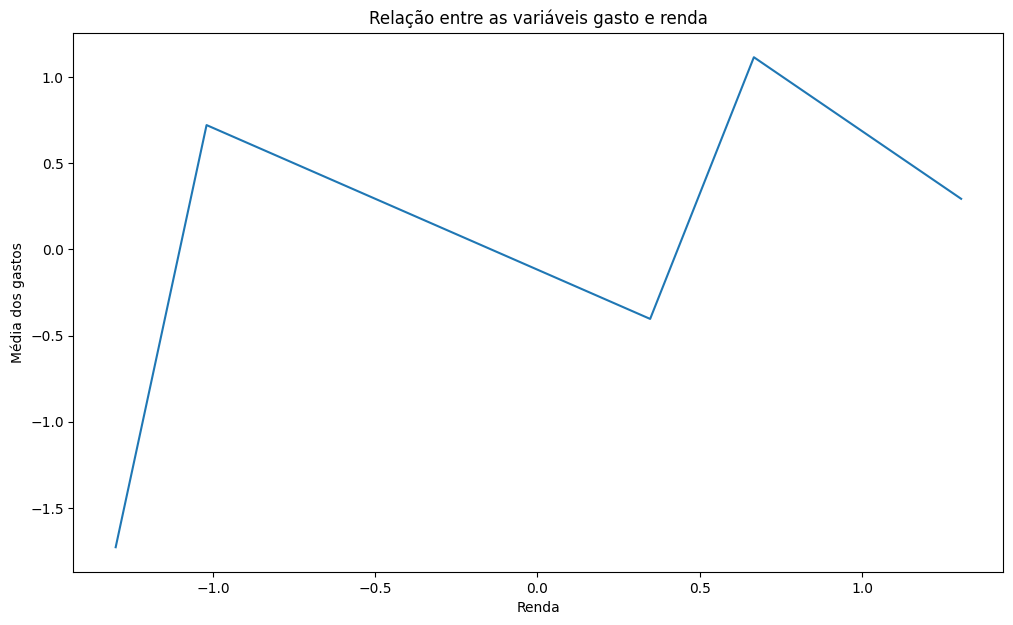

In [79]:
plt.figure(figsize=(12,7))
df_normalizado.groupby("gasto")["renda"].mean().plot()
plt.title("Relação entre as variáveis gasto e renda")
plt.ylabel("Média dos gastos")
plt.xlabel("Renda")

In [80]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(df_normalizado.drop("gasto",axis=1),df_normalizado["gasto"],test_size=0.3,random_state=0)

In [81]:
from sklearn.tree import DecisionTreeRegressor

arvore = DecisionTreeRegressor(max_depth=2, random_state=0)

In [82]:
arvore.fit(X_treino["renda"].to_frame(),y_treino)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [83]:
renda_treino = arvore.predict(X_treino["renda"].to_frame())
renda_teste = arvore.predict(X_teste["renda"].to_frame())

In [84]:
df_linear = pd.DataFrame({'renda': X_teste['renda'], 'gasto': renda_teste})

Text(0.5, 0, 'Renda')

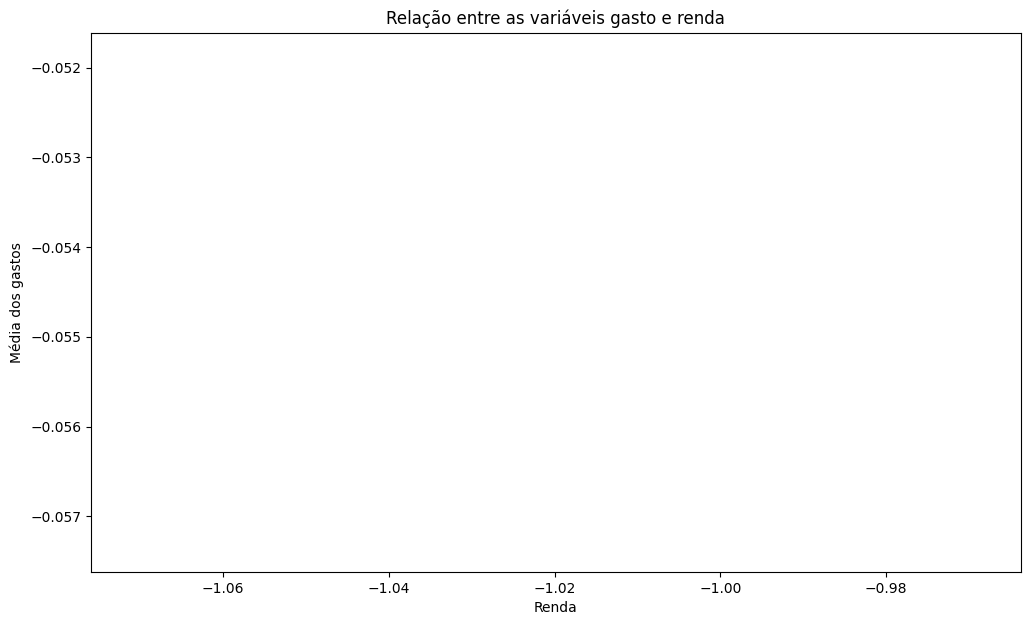

In [85]:
plt.figure(figsize=(12,7))
df_linear.groupby("gasto")["renda"].mean().plot()
plt.title("Relação entre as variáveis gasto e renda")
plt.ylabel("Média dos gastos")
plt.xlabel("Renda")

## Discretização via árvore com a biblioteca feature-engine

In [86]:
from feature_engine.discretisation import DecisionTreeDiscretiser

arvore_ft = DecisionTreeDiscretiser(variables=['renda'], regression=True, param_grid={'max_depth': [1, 2,3,4]})

In [87]:
arvore_ft.fit(X_treino, y_treino)

DecisionTreeDiscretiser(param_grid={'max_depth': [1, 2, 3, 4]},
                        variables=['renda'])

In [89]:
treino_disc = arvore_ft.transform(X_treino)
teste_disc = arvore_ft.transform(X_teste)

In [91]:
arvore_ft.binner_dict_

{'renda': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error')}

Text(0.5, 0, 'Renda')

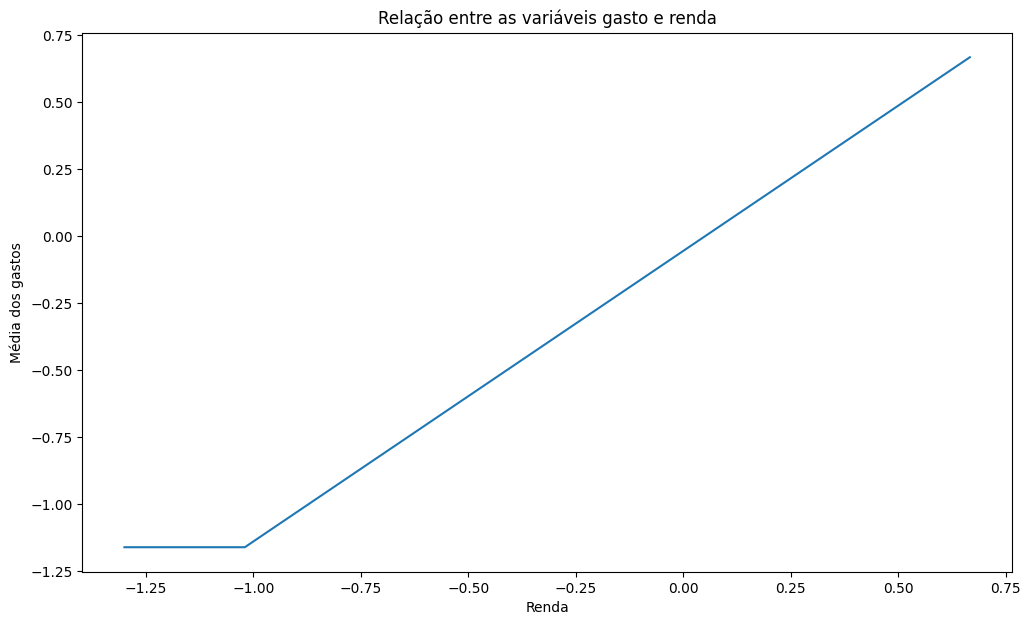

In [92]:
df_disc = pd.DataFrame({'renda': treino_disc['renda'], 'gasto': renda_treino})

plt.figure(figsize=(12,7))
df_disc.groupby("gasto")["renda"].mean().plot()
plt.title("Relação entre as variáveis gasto e renda")
plt.ylabel("Média dos gastos")
plt.xlabel("Renda")